## <center> Homework 4. Visualisation

First we should open our datasets and merge in one.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read our datasets
seasons_stats = pd.read_csv('seasons_stats.csv')
players = pd.read_csv('players.csv')
player_data = pd.read_csv('player_data.csv')

# merge the "seasons_stats.csv" and "players.csv" tables by the "player" field
merged_data = pd.merge(seasons_stats, players, on='Player')

# merge the received table with "player_data.csv" by the "player" - "name" fields
final_data = pd.merge(merged_data, player_data, left_on='Player', right_on='name')


final_data.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,birth_city,birth_state,name,year_start,year_end,position,height_y,weight_y,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,Curly Armstrong,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,314,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,NaN,NaN,Curly Armstrong,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
2,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,Yorktown,Indiana,Cliff Barker,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
3,315,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,Yorktown,Indiana,Cliff Barker,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
4,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,Yorktown,Indiana,Cliff Barker,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky


In [2]:
print(final_data.shape)

(23468, 68)


In [3]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23468 entries, 0 to 23467
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  23468 non-null  int64  
 1   Year          23468 non-null  float64
 2   Player        23468 non-null  object 
 3   Pos           23468 non-null  object 
 4   Age           23460 non-null  float64
 5   Tm            23468 non-null  object 
 6   G             23468 non-null  float64
 7   GS            17984 non-null  float64
 8   MP            23025 non-null  float64
 9   PER           22993 non-null  float64
 10  TS%           23381 non-null  float64
 11  3PAr          18548 non-null  float64
 12  FTr           23367 non-null  float64
 13  ORB%          20329 non-null  float64
 14  DRB%          20329 non-null  float64
 15  TRB%          21008 non-null  float64
 16  AST%          21793 non-null  float64
 17  STL%          20329 non-null  float64
 18  BLK%          20329 non-nu

As we can already see above, we have several repeating, numbering and empty columns from the input data sets. So we have to clean it up. We need information about height and weight only in cm, and kg (can delete 'height_y' and 'weight_y' columns. Also, we have two columns with education. But in this case, first we should compare this columns. Since we do not have confirmation of the authenticity of the origin of the datasets, we cannot know where the more reliable information is. Therefore, we can choose a column with more values.

In [4]:
final_data = final_data.drop(['Unnamed: 0_x', 'blanl', 'blank2', 'Unnamed: 0_y', 'collage', 'height_y', 'weight_y',  ], axis=1)

__<li>Now we can analyze how the average height of players changes during the period</li>__

In [5]:
height_p = final_data.groupby(by = 'Year')['height_x'].mean() / 100 

<AxesSubplot:xlabel='year', ylabel='height (m)'>

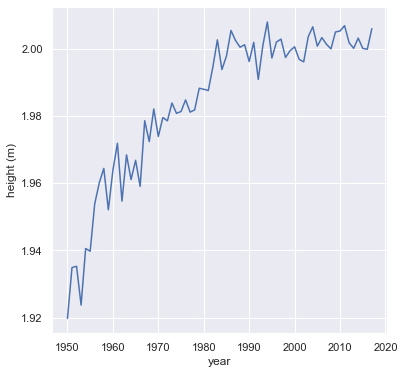

In [6]:
sns.set()
height_p.plot(x = height_p.index, y = 'height', grid = 'on', xlabel = 'year', ylabel = 'height (m)', figsize = (6,6))

In [7]:
print(round(height_p.min(), 2))
print(round(height_p.max(), 2))

1.92
2.01


From the graph, we can see that the average height of the players increased during the period. 
The minimum average value of height in a particular year was 1.92 meters, the maximum - 2.01 meters. 

__<li>We can visually test the hypothesis that there is a correlation between player height and career length.</li>__

In [8]:
final_data['career_lenght'] = final_data['year_end'] - final_data['year_start']

We have added a new feature 'career_lenght' to the dataset.

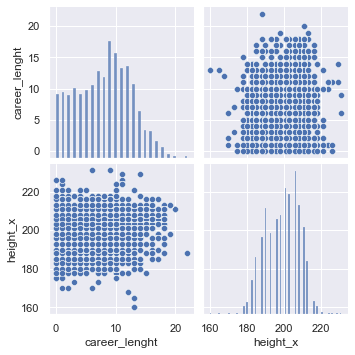

In [9]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    final_data[["career_lenght", "height_x"]]
)
plt.show()

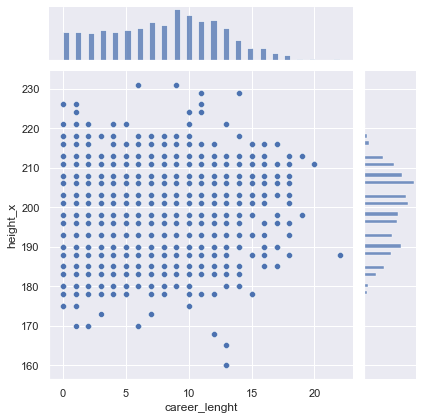

In [10]:
sns.jointplot(x="career_lenght", y="height_x", data=final_data, kind="scatter");

In [11]:
corr = final_data[["career_lenght", "height_x"]].corr()
print(corr) 

               career_lenght  height_x
career_lenght       1.000000  0.092221
height_x            0.092221  1.000000


From the graphs above and further inspection, we can see that there is no correlation between height and career length.

__<li>We can plot a graph that shows the distribution of player positions, where the x-axis represents the players' positions and the y-axis represents the number of seasons the player spent at each of those positions.</li>__

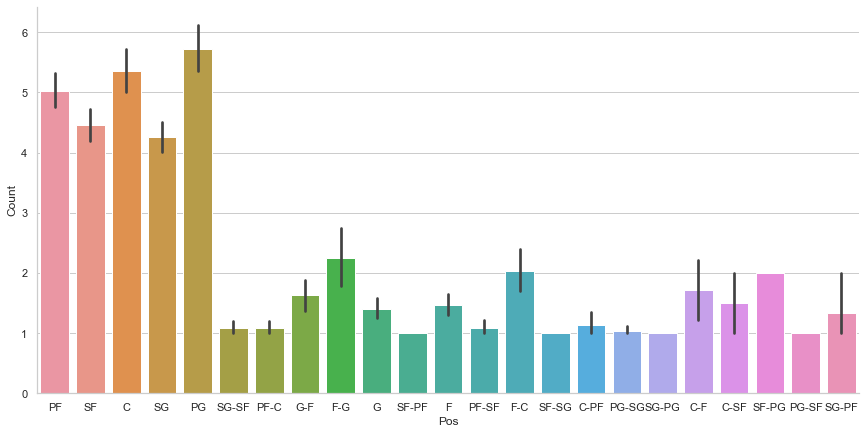

In [12]:
# data grouping by player and position
player_position = final_data.groupby(["Player", "Pos"]).size().reset_index(name="Count")

# plotting the distribution of player positions
sns.set_style("whitegrid")
sns.catplot(x="Pos", y="Count", kind="bar", data=player_position, height=6, aspect=2)

The graph shows that players spent the most seasons in positions: PG, C, PF, SF, SG. 

__<li>We can plot a pie chart of the distribution of players by college.</li>__

In [13]:
unique_colleges = final_data['college'].nunique()
print(f'Total unique colleges where players studied - {unique_colleges}.')

Total unique colleges where players studied - 424.


In [14]:
college_counts = final_data.groupby(['college'])['Player'].nunique()
above_40 = college_counts[college_counts >= 40].sort_values(ascending=False)
above_40.count()

13

Using the selection method, we determined that more than 40 players studied in the top 13 colleges.

In [15]:
above_40.head()

college
University of Kentucky                   84
University of California, Los Angeles    79
University of North Carolina             68
Duke University                          65
University of Kansas                     61
Name: Player, dtype: int64

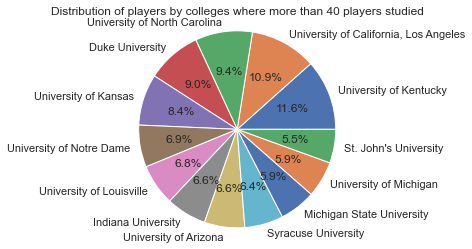

In [16]:
plt.pie(above_40, labels=above_40.index, autopct='%1.1f%%')
plt.title('Distribution of players by colleges where more than 40 players studied')
plt.axis('equal')
plt.show()

Of the top 10 colleges, the most players graduated from: 
<li>University of Kentucky (11.6% of the total number of top 10 colleges)</li>
<li>University of California, Los Angeles (10.9%)</li>
<li>University of North Carolina  (9.4%)</li>
<li>Duke University  (9.0%)</li>
<li>University of Kansas (8.4%)</li>

We can calculate the ratio of top colleges to the total number of colleges where players studied. 

In [17]:
colleges_ratio = above_40.count() / unique_colleges 
print(f"{colleges_ratio * 100:.2f}%")

3.07%


We can also calculate the ratio of graduates from the top 10 colleges to all colleges.

In [18]:
college_counts = final_data.groupby(['college'])['Player'].nunique()
above_40 = college_counts[college_counts >= 40]
above_40_sum = above_40.sum()
below_40 = college_counts[college_counts < 40]
below_40_sum = below_40.sum()

print("The sum of the players in the top colleges:", above_40_sum)
print("Total players at other colleges:", below_40_sum)

The sum of the players in the top colleges: 724
Total players at other colleges: 2819


In [19]:
players_ratio = above_40_sum/(below_40_sum + above_40_sum)
print(f"{players_ratio * 100:.2f}%")

20.43%


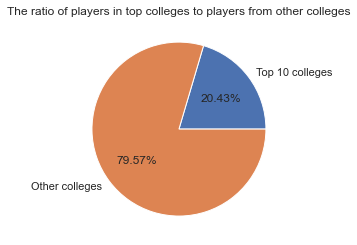

In [20]:
values = [above_40_sum, below_40_sum]
labels = ['Top 10 colleges', 'Other colleges']
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('The ratio of players in top colleges to players from other colleges')
plt.show()

__<li>We can calculate the BMI (body mass index) and see how its average value has changed during the period.</li>__

In [21]:
final_data['BMI'] = final_data['weight_x'] / ((final_data['height_x'] / 100) ** 2)

We have added a new feature to the dataset. So can make a visualization.

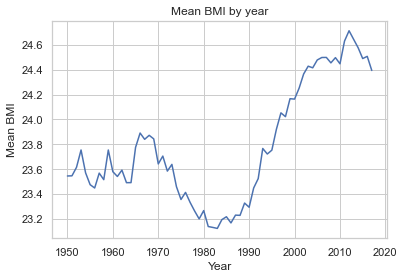

In [22]:
bmi_by_year = final_data.groupby('Year')['BMI'].mean()

plt.plot(bmi_by_year.index, bmi_by_year.values)
plt.title('Mean BMI by year')
plt.xlabel('Year')
plt.ylabel('Mean BMI')
plt.show()

A normal body mass index is 18.5-24.9.
During the studied period, the indicator was within the norm, with a decrease in the 80s and 90s.